In [4]:
import pandas as pd
import numpy as np
from qtaim_embed.core.dataset import HeteroGraphNodeLabelDataset
from scipy import stats

dev_dataset = "../../../data/splits_1101/test_qm9_qtaim_1025_labelled.pkl"
# read the dataset
dev_df = pd.read_pickle(dev_dataset)

In [2]:
dataset_dev = HeteroGraphNodeLabelDataset(
    file=dev_dataset,
    standard_scale_features=False,
    standard_scale_targets=False,
    log_scale_features=False,
    log_scale_targets=False,
    allowed_ring_size=[5],
    allowed_charges=None,
    allowed_spins=None,
    self_loop=True,
    debug=False,
    extra_keys={
        "atom": [
            "extra_feat_atom_Lagrangian_K",
            "extra_feat_atom_Hamiltonian_K",
            "extra_feat_atom_e_density",
            "extra_feat_atom_lap_e_density",
            "extra_feat_atom_e_loc_func",
            "extra_feat_atom_ave_loc_ion_E",
            "extra_feat_atom_delta_g_promolecular",
            "extra_feat_atom_delta_g_hirsh",
            "extra_feat_atom_esp_nuc",
            "extra_feat_atom_esp_e",
            "extra_feat_atom_esp_total",
            "extra_feat_atom_grad_norm",
            "extra_feat_atom_lap_norm",
            "extra_feat_atom_eig_hess",
            "extra_feat_atom_det_hessian",
            "extra_feat_atom_ellip_e_dens",
            "extra_feat_atom_eta",
        ],
        "bond": [
            "extra_feat_bond_Lagrangian_K",
            "extra_feat_bond_Hamiltonian_K",
            "extra_feat_bond_e_density",
            "extra_feat_bond_lap_e_density",
            "extra_feat_bond_e_loc_func",
            "extra_feat_bond_ave_loc_ion_E",
            "extra_feat_bond_delta_g_promolecular",
            "extra_feat_bond_delta_g_hirsh",
            "extra_feat_bond_esp_nuc",
            "extra_feat_bond_esp_e",
            "extra_feat_bond_esp_total",
            "extra_feat_bond_grad_norm",
            "extra_feat_bond_lap_norm",
            "extra_feat_bond_eig_hess",
            "extra_feat_bond_det_hessian",
            "extra_feat_bond_ellip_e_dens",
            "extra_feat_bond_eta",
            "bond_length",
        ],
        "global": [],
    },
    target_dict={
        "atom": [
            "extra_feat_atom_Lagrangian_K",
            "extra_feat_atom_Hamiltonian_K",
            "extra_feat_atom_e_density",
            "extra_feat_atom_lap_e_density",
            "extra_feat_atom_e_loc_func",
            "extra_feat_atom_ave_loc_ion_E",
            "extra_feat_atom_delta_g_promolecular",
            "extra_feat_atom_delta_g_hirsh",
            "extra_feat_atom_esp_nuc",
            "extra_feat_atom_esp_e",
            "extra_feat_atom_esp_total",
            "extra_feat_atom_grad_norm",
            "extra_feat_atom_lap_norm",
            "extra_feat_atom_eig_hess",
            "extra_feat_atom_det_hessian",
            "extra_feat_atom_ellip_e_dens",
            "extra_feat_atom_eta",
        ],
        "bond": [
            "extra_feat_bond_Lagrangian_K",
            "extra_feat_bond_Hamiltonian_K",
            "extra_feat_bond_e_density",
            "extra_feat_bond_lap_e_density",
            "extra_feat_bond_e_loc_func",
            "extra_feat_bond_ave_loc_ion_E",
            "extra_feat_bond_delta_g_promolecular",
            "extra_feat_bond_delta_g_hirsh",
            "extra_feat_bond_esp_nuc",
            "extra_feat_bond_esp_e",
            "extra_feat_bond_esp_total",
            "extra_feat_bond_grad_norm",
            "extra_feat_bond_lap_norm",
            "extra_feat_bond_eig_hess",
            "extra_feat_bond_det_hessian",
            "extra_feat_bond_ellip_e_dens",
            "extra_feat_bond_eta",
            "bond_length",
        ],
        "global": [],
    },
    extra_dataset_info={},
)

... > creating MoleculeWrapper objects


100%|██████████| 13385/13385 [00:04<00:00, 3126.02it/s]


... > bond_feats_error_count:  0
... > atom_feats_error_count:  0
element set {'N', 'H', 'F', 'O', 'C'}
selected atomic keys ['extra_feat_atom_Lagrangian_K', 'extra_feat_atom_Hamiltonian_K', 'extra_feat_atom_e_density', 'extra_feat_atom_lap_e_density', 'extra_feat_atom_e_loc_func', 'extra_feat_atom_ave_loc_ion_E', 'extra_feat_atom_delta_g_promolecular', 'extra_feat_atom_delta_g_hirsh', 'extra_feat_atom_esp_nuc', 'extra_feat_atom_esp_e', 'extra_feat_atom_esp_total', 'extra_feat_atom_grad_norm', 'extra_feat_atom_lap_norm', 'extra_feat_atom_eig_hess', 'extra_feat_atom_det_hessian', 'extra_feat_atom_ellip_e_dens', 'extra_feat_atom_eta']
selected bond keys ['extra_feat_bond_Lagrangian_K', 'extra_feat_bond_Hamiltonian_K', 'extra_feat_bond_e_density', 'extra_feat_bond_lap_e_density', 'extra_feat_bond_e_loc_func', 'extra_feat_bond_ave_loc_ion_E', 'extra_feat_bond_delta_g_promolecular', 'extra_feat_bond_delta_g_hirsh', 'extra_feat_bond_esp_nuc', 'extra_feat_bond_esp_e', 'extra_feat_bond_esp_tot

100%|██████████| 13385/13385 [00:23<00:00, 575.85it/s]


included in labels
{'atom': ['extra_feat_atom_Lagrangian_K', 'extra_feat_atom_Hamiltonian_K', 'extra_feat_atom_e_density', 'extra_feat_atom_lap_e_density', 'extra_feat_atom_e_loc_func', 'extra_feat_atom_ave_loc_ion_E', 'extra_feat_atom_delta_g_promolecular', 'extra_feat_atom_delta_g_hirsh', 'extra_feat_atom_esp_nuc', 'extra_feat_atom_esp_e', 'extra_feat_atom_esp_total', 'extra_feat_atom_grad_norm', 'extra_feat_atom_lap_norm', 'extra_feat_atom_eig_hess', 'extra_feat_atom_det_hessian', 'extra_feat_atom_ellip_e_dens', 'extra_feat_atom_eta'], 'bond': ['bond_length', 'extra_feat_bond_Lagrangian_K', 'extra_feat_bond_Hamiltonian_K', 'extra_feat_bond_e_density', 'extra_feat_bond_lap_e_density', 'extra_feat_bond_e_loc_func', 'extra_feat_bond_ave_loc_ion_E', 'extra_feat_bond_delta_g_promolecular', 'extra_feat_bond_delta_g_hirsh', 'extra_feat_bond_esp_nuc', 'extra_feat_bond_esp_e', 'extra_feat_bond_esp_total', 'extra_feat_bond_grad_norm', 'extra_feat_bond_lap_norm', 'extra_feat_bond_eig_hess', 'e

100%|██████████| 13385/13385 [00:00<00:00, 13592.56it/s]


original loader node types: dict_keys(['atom', 'bond', 'global'])
original loader label types: dict_keys(['atom', 'bond'])
... > loaded dataset


In [10]:
def gather_atom_level_stats(dataset_dev):
    atoms_in = [
        i.split("_")[-1]
        for i in dataset_dev.exclude_names["atom"]
        if "chemical_symbol_" in i
    ]
    atom_feats_qtaim = [
        i for i in dataset_dev.include_names["atom"] if "extra_feat_atom_" in i
    ]
    feat_dict = {}
    feat_dict_summary = {}
    feat_dict_complete = {}

    for probe_atom_type in atoms_in:
        print("capturing stats for atom type: ", probe_atom_type)
        for probe_descriptor in atom_feats_qtaim:
            # probe_atom_type = "C"
            # probe_descriptor = "extra_feat_atom_Lagrangian_K"

            for graph in dataset_dev.graphs:
                probe_ind = dataset_dev.exclude_names["atom"].index(
                    "chemical_symbol_" + probe_atom_type
                )
                probe_col = graph.ndata["feat"]["atom"][:, probe_ind]

                probe_desc_ind = dataset_dev.include_names["atom"].index(
                    probe_descriptor
                )
                atom_type_positive_ind = np.where(probe_col == 1)[0]
                feat_at_atom = graph.ndata["labels"]["atom"][
                    atom_type_positive_ind, probe_desc_ind
                ]

                if probe_atom_type not in feat_dict.keys():
                    feat_dict[probe_atom_type] = {}
                if probe_descriptor not in feat_dict[probe_atom_type].keys():
                    feat_dict[probe_atom_type][probe_descriptor] = []
                feat_dict[probe_atom_type][probe_descriptor].extend(feat_at_atom)

            feat_dict[probe_atom_type][probe_descriptor] = np.array(
                feat_dict[probe_atom_type][probe_descriptor]
            )

    for probe_descriptor in atom_feats_qtaim:
        for probe_atom_type in atoms_in:
            if probe_descriptor not in feat_dict_complete.keys():
                feat_dict_complete[probe_descriptor] = []
            feat_dict_complete[probe_descriptor].extend(
                feat_dict[probe_atom_type][probe_descriptor]
            )

    for k, v in feat_dict.items():
        if k not in feat_dict_summary.keys():
            feat_dict_summary[k] = {}
        for sub_k, sub_v in v.items():
            dict_summary_stats = {
                "mean": np.mean(sub_v),
                "std": np.std(sub_v),
                "min": np.min(sub_v),
                "max": np.max(sub_v),
                "mode": stats.mode(sub_v)[0],
            }
            feat_dict_summary[k][sub_k] = dict_summary_stats

    return feat_dict, feat_dict_complete, feat_dict_summary


feat_dict, feat_dict_complete, feat_dict_summary = gather_atom_level_stats(dataset_dev)

capturing stats for atom type:  N
capturing stats for atom type:  H
capturing stats for atom type:  F
capturing stats for atom type:  O
capturing stats for atom type:  C


In [14]:
def gather_bond_level_stats(dataset_dev):
    bond_feats_qtaim = [
        i for i in dataset_dev.include_names["bond"] if "extra_feat_bond_" in i
    ]
    feat_dict_summary = {}
    feat_dict_complete = {}

    for probe_descriptor in bond_feats_qtaim:
        for graph in dataset_dev.graphs:
            probe_desc_ind = dataset_dev.include_names["bond"].index(probe_descriptor)
            feat_at_atom = graph.ndata["labels"]["bond"][:, probe_desc_ind]

            if probe_descriptor not in feat_dict_complete.keys():
                feat_dict_complete[probe_descriptor] = []
            feat_dict_complete[probe_descriptor].extend(feat_at_atom)

        feat_dict_complete[probe_descriptor] = np.array(
            feat_dict_complete[probe_descriptor]
        )

    for k, v in feat_dict_complete.items():
        if k not in feat_dict_summary.keys():
            feat_dict_summary[k] = {}
        dict_summary_stats = {
            "mean": np.mean(v),
            "std": np.std(v),
            "min": np.min(v),
            "max": np.max(v),
            "mode": stats.mode(v)[0],
        }
        feat_dict_summary[k] = dict_summary_stats
    return feat_dict_complete, feat_dict_summary


feat_dict_complete, feat_dict_summary = gather_bond_level_stats(dataset_dev)

In [16]:
feat_dict_complete

{'extra_feat_bond_Lagrangian_K': array([0.03620145, 0.04419453, 0.05288771, ..., 0.03521625, 0.17293593,
        0.05124786], dtype=float32),
 'extra_feat_bond_Hamiltonian_K': array([0.3036617 , 0.29256713, 0.17661889, ..., 0.29406413, 0.41768956,
        0.4368419 ], dtype=float32),
 'extra_feat_bond_e_density': array([-0.3036617 , -0.29256713, -0.17661889, ..., -0.29406413,
        -0.41768956, -0.4368419 ], dtype=float32),
 'extra_feat_bond_lap_e_density': array([-1.069841  , -0.9934904 , -0.49492472, ..., -1.0353914 ,
        -0.9790145 , -1.5423762 ], dtype=float32),
 'extra_feat_bond_e_loc_func': array([0.98943394, 0.9830637 , 0.9562653 , ..., 0.9893821 , 0.84029436,
        0.9878577 ], dtype=float32),
 'extra_feat_bond_ave_loc_ion_E': array([0.44933584, 0.43088365, 0.44190475, ..., 0.47749993, 0.6687556 ,
        0.57182604], dtype=float32),
 'extra_feat_bond_delta_g_promolecular': array([0.28261948, 0.27357894, 0.31212416, ..., 0.28179213, 0.32422242,
        0.48293623], dtyp

In [56]:
atoms_in = [
    i.split("_")[-1]
    for i in dataset_dev.exclude_names["atom"]
    if "chemical_symbol_" in i
]
atoms_in

['C', 'H', 'F', 'N', 'O']

In [59]:
dataset_dev.include_names
atom_feats_qtaim = [
    i[16:] for i in dataset_dev.include_names["atom"] if "extra_feat_atom_" in i
]
atom_feats_qtaim

['Lagrangian_K',
 'Hamiltonian_K',
 'e_density',
 'lap_e_density',
 'e_loc_func',
 'ave_loc_ion_E',
 'delta_g_promolecular',
 'delta_g_hirsh',
 'esp_nuc',
 'esp_e',
 'esp_total',
 'grad_norm',
 'lap_norm',
 'eig_hess',
 'det_hessian',
 'ellip_e_dens',
 'eta']

In [51]:
feat_dict_summary

{'C': {'extra_feat_atom_Lagrangian_K': {'mean': 7.1804614,
   'std': 22.808365,
   'min': 0.00082105416,
   'max': 180.31058}}}

In [47]:
dict_summary_stats = {"atom": {}, "bond": {}}
dict_histograms = {"atom": {}, "bond": {}}


for col in dev_df.columns:
    if "extra_feat" in col:
        if "atom" == col.split("_")[2]:
            qtaim_desc_name = col[16:]
            if qtaim_desc_name not in dict_summary_stats["atom"]:
                dict_summary_stats["atom"][qtaim_desc_name] = []
                dict_histograms["atom"][qtaim_desc_name] = []
            # [dict_histograms["atom"][qtaim_desc_name].append(i) for i in dev_df[col]]
            for i in dev_df[col]:
                if type(i[0]) == list:
                    [dict_histograms["atom"][qtaim_desc_name].append(j) for j in i[0]]
                else:
                    [dict_histograms["atom"][qtaim_desc_name].append(j) for j in i]
            dict_histograms["atom"][qtaim_desc_name] = np.array(
                dict_histograms["atom"][qtaim_desc_name]
            )
        if "bond" == col.split("_")[2]:
            qtaim_desc_name = col[16:]
            if qtaim_desc_name not in dict_summary_stats["bond"]:
                dict_summary_stats["bond"][qtaim_desc_name] = []
                dict_histograms["bond"][qtaim_desc_name] = []
            for i in dev_df[col]:
                if type(i[0]) == list:
                    [dict_histograms["bond"][qtaim_desc_name].append(j) for j in i[0]]
                else:
                    [dict_histograms["bond"][qtaim_desc_name].append(j) for j in i]
            dict_histograms["bond"][qtaim_desc_name] = np.array(
                dict_histograms["bond"][qtaim_desc_name]
            )
        # assert that all lists are of the same length in bond
for key in dict_histograms["bond"].keys():
    assert len(dict_histograms["bond"][key]) == len(
        dict_histograms["bond"]["Lagrangian_K"]
    )

for key in dict_histograms["atom"].keys():
    assert len(dict_histograms["atom"][key]) == len(
        dict_histograms["atom"]["Lagrangian_K"]
    )

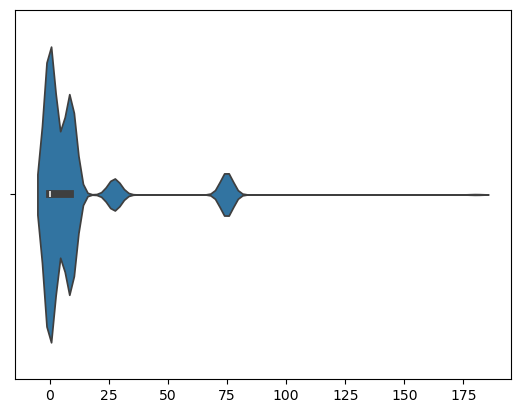

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot ["bond"]["Lagrangian_K"]

# create a violin plot
sns.violinplot(x=dict_histograms["atom"]["Lagrangian_K"])
# show the plot
plt.show()

In [49]:
print(dict_histograms["atom"]["Lagrangian_K"].max())

180.3105721
